In [1]:
# Init library
import cv2
import os
from matplotlib import pyplot as plt



In [11]:
# image 2 salt pepper
# image 4 low contrast
#A simple way to calculate contrast is by computing the standard deviation of the greyed image pixel intensities.
class Result:
    img = ""
    count = 0

    # The class "constructor" - It's actually an initializer
    def __init__(self, img, count):
        self.img = img
        self.count = count


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images


def count_obj(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = gray.std()
    if contrast< 40 :   
        equ = cv2.equalizeHist(gray)
        blur = cv2.medianBlur(equ, 5)
        # #blur1 = cv2.GaussianBlur(equ, (11, 11), 0)
    else:
      blur = cv2.medianBlur(gray,5)
    #ret, thresh = cv2.threshold(
    #   blur, 0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    canny = cv2.Canny(blur, 30, 100)
    dilated = cv2.dilate(canny, (1, 1), iterations=0)
    cnt, hierarchy = cv2.findContours(
        dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb2 = cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    return cnt, rgb2


def show_images(images):
    rows = 1
    cols = 4
    for i in range(0, len(images), rows*cols):
        fig = plt.figure(figsize=(7, 8))
        for j in range(0, rows*cols):
            ax = fig.add_subplot(rows, cols, j+1)
            ax.set_title("Image "+str(j))
            plt.imshow(images[i+j])
    plt.show()


def show_result(images):
    rows = 1
    cols = 4
    for i in range(0, len(images), rows*cols):
        fig = plt.figure(figsize =(20, 20))
        for j in range(0, rows*cols):
            ax = fig.add_subplot(rows, cols, j+1)
            ax.set_title("Image  "+str(j)+":" +
                         str(images[i+j].count) + " objects")
            plt.imshow(images[i+j].img)
    plt.show()



def draw_contour(images):
    result = []
    for image in images:
        cnt, rgb2 = count_obj(image)
        print(len(cnt))
        res = Result(rgb2, len(cnt))
        result.append(res)
    return result

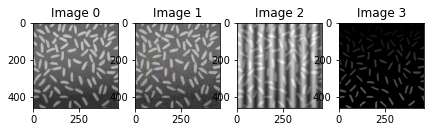

In [12]:
# Fetch img
images = load_images_from_folder("test")
show_images(images)

99
116
230
98


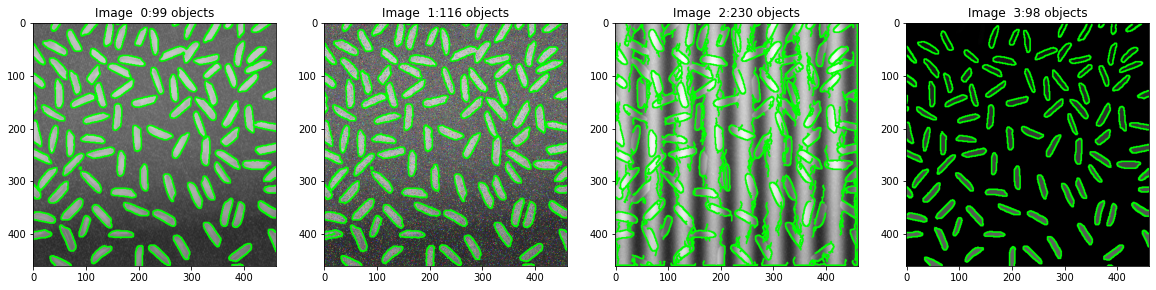

In [13]:
# Result
output = draw_contour(images)
show_result(output)